Nina Hill TNC Astraea Pilot Project 2020 nina.hill@tnc.org 

In [1]:
from earthai.init import *

import pyspark.sql.functions as F
import pandas as pd
import geopandas as gpd

from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon, box
import matplotlib.pyplot as plt


Importing EarthAI libraries.
EarthAI version 1.4.2; RasterFrames version 0.9.0.dev+astraea.1ce1ff3; PySpark version 2.4.4

Creating SparkSession...
  SparkSession is available as `spark`.


In [2]:
csvdat = pd.read_csv('astraea_biomass/vordat2.csv') # remember you have to connect/clone Git repository into notebook first

In [3]:
type(csvdat)

pandas.core.frame.DataFrame

In [4]:
csvdat.head()

,Transect,SystemType.x,MonDate,VOR_N,VOR_E,VOR_S,VOR_W,Class,TransectName,SystemType.y,...,OFFICE,UnitName_OLD,SiteName_OLD,Organization,SiteName,MonYear,RecordID,VORave,VORcm,Biomass
0,814.0,Upland Grassland,2008-08-11,4.5,4.5,NaN,3.5,A 2008 VOR Summary.xlsx,Benson E 1,UG,...,21.0,Glenwood Work Area,Benson E,MNDNR,Benson WMA,2008,2008_35_814,4.166667,41.666667,745.823333
1,815.0,Upland Grassland,2008-08-11,2.5,2.5,NaN,3.0,A 2008 VOR Summary.xlsx,Benson E 2,UG,...,21.0,Glenwood Work Area,Benson E,MNDNR,Benson WMA,2008,2008_35_815,2.666667,26.666667,470.168333
2,816.0,Upland Grassland,2008-08-07,1.0,0.5,1.0,1.5,A 2008 VOR Summary.xlsx,Freeman N 4,UG,...,21.0,Glenwood Work Area,Freeman N,MNDNR,Bill Freeman WMA,2008,2008_36_816,1.000000,10.000000,163.885000
3,817.0,Upland Grassland,2008-08-07,2.0,1.5,1.5,1.5,A 2008 VOR Summary.xlsx,Freeman N 5,UG,...,21.0,Glenwood Work Area,Freeman N,MNDNR,Bill Freeman WMA,2008,2008_36_817,1.625000,16.250000,278.741250
4,818.0,Upland Grassland,2008-08-07,2.0,1.0,2.0,2.0,A 2008 VOR Summary.xlsx,Freeman N 6,UG,...,21.0,Glenwood Work Area,Freeman N,MNDNR,Bill Freeman WMA,2008,2008_36_818,1.750000,17.500000,301.712500


Since I am feeding in coordinates to a regular dataframe I need to identify lat long columns to combine into 'geometry' column as I convert regular pandas df to geopandas geodf. And tell it that 'MonDate' is a date field.

In [5]:
geodat = gpd.GeoDataFrame(csvdat, geometry=gpd.points_from_xy(csvdat.StartLong, csvdat.StartLat))

In [6]:
geodat['Date'] = pd.to_datetime(geodat['MonDate'])

In [7]:
geodat.columns

Index(['Transect', 'SystemType.x', 'MonDate', 'VOR_N', 'VOR_E', 'VOR_S',
       'VOR_W', 'Class', 'TransectName', 'SystemType.y', 'StartLat',
       'StartLong', 'Bearing', 'MGMTUNIT', 'SITE', 'OFFICE', 'UnitName_OLD',
       'SiteName_OLD', 'Organization', 'SiteName', 'MonYear', 'RecordID',
       'VORave', 'VORcm', 'Biomass', 'geometry', 'Date'],
      dtype='object')

In [8]:
len(geodat) # number of records in dataset

4774

In [9]:
geodat['TransectName'].nunique() # number of unique TransectName, at 55 SiteNames btw

2166

In [10]:
geodat['Date'].nunique() # number of unique monitoring dates

511

In [11]:
colnames = ['TransectName', 'MonDate'] # idk how to ask it to count the unique trans-date combos, but from R I see it is 4774
geodat[colnames].nunique()

TransectName    2166
MonDate          511
dtype: int64

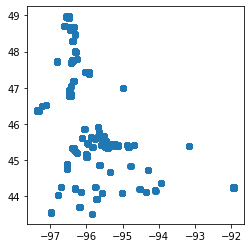

In [12]:
geodat.plot()

OMG, I'm so happy. Yay I'm learning!

Now, how do I use these coords to get EarthAI imagery, or to mask imagery that I queried from other py script using the outerbound polygon? 

In [ ]:
geodat['MonDate'].head()

In [ ]:
colnames = ['RecordID', 'MonDate','TransectName']
geodat[colnames].head()

In [ ]:
test = geodat[colnames].head() # start with just a few

In [ ]:
type(test)

In [ ]:
test['Date'] = pd.to_datetime(test['MonDate'])

In [ ]:
type(test['Date'])